# Hypothesis Testing - Recap

## Introduction

You just learned how to create an experiment and interpret the results! Let's review some of the specific things you have learned.

## Key Takeaways

Some of the key takeaways from this section include:
* It's important to have a sound approach to experimental design to be able to determine the significance of your findings
* Start by examining any existing research to see if it can shed light on the problem you're studying
* Start with a clear alternative and null hypothesis for your experiment to "prove"
* It's important to have a thoughtfully selected control group from the same population for your trial to distinguish effect from variations based on population, time or other factors
* Your sample size needs to be selected carefully to ensure your results have a good chance of being statistically significant
* Your results should be reproducible by other people and using different samples from the population
* The p-value for an outcome determines how likely it is that the outcome could occur under the null hypothesis
* $\alpha$ is the marginal threshold at which we're comfortable rejecting the null hypothesis
* An $\alpha$ value of 0.05 is a common choice for many experiments
* Effect size measures just the size of the difference between two groups under observation, whereas statistical significance combines effect size with sample size
* A one sample t-test is used to determine whether a sample comes from a population with a specific mean 
* A two sample t-test is used to determine if two population means are equal
* Type 1 errors (false positives) are when we accept an alternative hypothesis which is actually false
* The $\alpha$ that we pick is the likelihood that we will get a type 1 error due to random chance
* Type 2 errors (false negatives) are when we reject an alternative hypothesis which is actually true

# HYPOTHESIS TESTS

+ A statistical technique used to test a prediction.

## Types of Hypothesis Tests

![](imghypo.jpg)

- H0 is reference -> as a result, it can be rejected or it can't be rejected.

- Don't say that H0 is accepted since we do not know the error.

## Error Types

## P-value

- Error rate at the beginning:  alpha (0.05)

- Error rate obtained at the end: p value

- If p < alpha -> be happy :) reject H0!

- But it is not good for each case! For example if you do a test for convenience to the distribution, you do not want to reject Ho. Because H0 says "there is no difference between example distribution and theoretic distribution".

- Alpha: Acceptable error rate with 95% confidence interval.


# Steps of Hypothesis Testing

1. Create hypothesis and determine the directions

2. Determine significance level (alpha) and table value

3. Determine and estimate test statistics

4. Compare estimated table value and alpha table value

    Test statistics (Zh) > Table value (Zt)  ->  reject Ho

5. Interpret

# One Sample T-Test
## Hypothesis and Test Statistics

Used to test for sample mean.

**Example:** Mean of a continuous variable equals or does not equal to a value?

![](imghypo.jpg)


It can be:
* Two direction
* One (down) direction
* One (up) direction


**If population standard deviation is known or n>30:**

![](imgz.jpg)


**If population standard deviation is not known and n<30:**

![](imgt.jpg)


**Assumption:** To use One sample T Test, the variable should have normal distribution.


**Hypothesis tests are divided into 2:**

* parametric test: if assumptions are true; it is parametric test

* nonparametric test: if assumptions are not true; it is nonparametric test


&#9989; **Problem:** Is the time spent on my webpage really 170 seconds?

In [2]:
import pandas as pd
import numpy as np
import pandas as pd
import scipy.stats as stats
import pylab 
from matplotlib.pyplot import plot

In [3]:
records = np.array([17, 160, 234, 149, 145, 107, 197, 75, 201, 225, 211, 119, 
              157, 145, 127, 244, 163, 114, 145,  65, 112, 185, 202, 146,
              203, 224, 203, 114, 188, 156, 187, 154, 177, 95, 165, 50, 110, 
              216, 138, 151, 166, 135, 155, 84, 251, 173, 131, 207, 121, 120])

records[1:10]

array([160, 234, 149, 145, 107, 197,  75, 201, 225])

# Plot

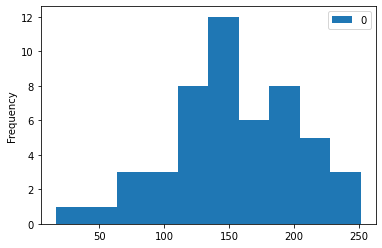

In [4]:
pd.DataFrame(records).plot.hist();

# qqplot

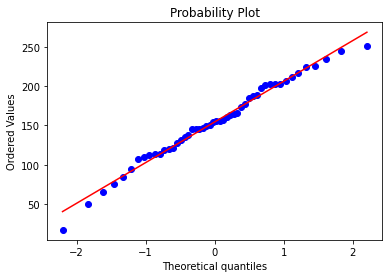

In [5]:
stats.probplot(records, dist = "norm", plot = pylab)
pylab.show()

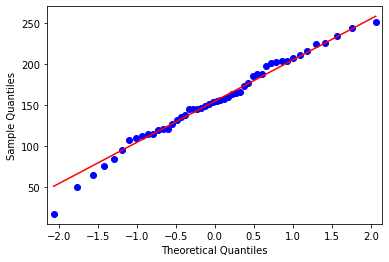

In [6]:
import statsmodels.api as sm
sm.qqplot(records, line = "s") 
pylab.show()

# Shapiro-Wilks

In [7]:
from scipy.stats import shapiro
shapiro(records)

(0.9853105545043945, 0.7848747968673706)

* first: t statistics 

* second: p value (it is not smaller than 0.05)

We can't reject Ho; it says there is no difference between test statistics and theoretical statistics. So "not rejecting" is good.

# **one sample t test:**

In [8]:
stats.ttest_1samp(records, popmean = 170)

Ttest_1sampResult(statistic=-2.1753117985877966, pvalue=0.034460415195071446)

popmean = mu = theoretic population mean

here, p<0.05; we reject Ho; avarage time spent on webpage is different than 170

&#9989; **obtaining t table value:**

In [9]:
stats.t.ppf(q = 0.025, df = len(records) -1)

-2.0095752344892093

q = alpha/2

degree of freedom = -1

&#9989; **obtaining p-value from t statistics:**

In [10]:
stats.t.cdf(x = -2.1753117985877966, df = len(records)-1) * 2

0.034460415195071446

+ we multiply because it has 2 directions.

+ for another one with 1 direction; for example <; these should be correct to accept Ho:

p-value/2 < 0.05 & t > 0

&#9989; **estimating 95% confidence interval:**

In [11]:
import statsmodels.stats.api as sms
sms.DescrStatsW(records).tconfint_mean()

(139.95008462736266, 168.80991537263733)

## Nonparametric one sample T test

&#9989; if we cannot do parametric one sample test; we should do nonparametric one sample testyou can directly import a specific function from a library without whole library:

In [12]:
from statsmodels.stats.descriptivestats import sign_test

In [13]:
sign_test(records, 170)

(-7.0, 0.06490864707227219)

* first: test statistics

* second: p value

because p<0.05, it seems Ho is rejected. but it is not, because avarage is not different from 170 with statistical significance

In [14]:
?sign_test

# One Sample Proportion Test

## Hypothesis and statistics

**hypothesis:**

![](imghypotwo.jpg)

**test statistics:**

![](imgtestst.jpg)

**assumption:**

n>30

**Problem:** we want to test conversion rate

HO: p = 0.125 
    
H1: p != 0.125

500 people clicked, 40 people shopped

Sample rate: 0.08


**Conversion rate confidence interval:**

![](prob.jpg)

p(expected value): 0.10

alpha: 0.05

ztable: 1.96

n = 500

confidence interval: 0.092-0.109

In [15]:
from statsmodels.stats.proportion import proportions_ztest

In [16]:
count = 40
nobs = 500
value = 0.125

In [17]:
proportions_ztest(count, nobs, value)

(-3.7090151628513017, 0.0002080669689845979)

&#9989; p = 0.0002 so Ho is rejected; it means the ratio for population is different from 0.125

In [18]:
40/500

0.08

+ it means difference is downward

**new hypothesis:**

H0 > 0.125

H1 <= 0.125

In [19]:
proportions_ztest(count, nobs, value, alternative = "smaller")

(-3.7090151628513017, 0.00010403348449229895)

p = 0.0001; reject H0; it is smaller that 0.125 with 95% confidence interval

# Unpaired Two Samples T Test - AB Test

## Hypothesis and test statistics

It is used when you want to do comparison between 2 groups (numeric, continuous)

**Hypothesis:**

![](ttesthypo.jpg)


**Test statistics:**

![](tteststa.jpg)


Confidence interval = sample statistics +- table value*standart error


**Assumptions:**

- normality
- variance homogenity

&#9989; **problem:** Recommend a product. Compare income from that product with and without recommendation

![](probab.jpg)

In [28]:
A = pd.DataFrame([30,27,21,27,29,30,20,20,27,32,35,22,24,23,25,27,23,27,23,
        25,21,18,24,26,33,26,27,28,19,25])

B = pd.DataFrame([37,39,31,31,34,38,30,36,29,28,38,28,37,37,30,32,31,31,27,
        32,33,33,33,31,32,33,26,32,33,29])


**combine A and B:**

In [29]:
import pandas as pd
A_B = pd.concat([A,B], axis = 1)
# name the columns:
A_B.columns = ["A","B"]
A_B.head()

,A,B
0,30,37
1,27,39
2,21,31
3,27,31
4,29,34


&#9989; **is there any distinctive feature? to see, concat and evaluate as one variable:**

In [30]:
GROUP_A = np.arange(len(A))
GROUP_A = pd.DataFrame(GROUP_A)
GROUP_A[:] = "A"

In [31]:
A = pd.concat([A, GROUP_A], axis = 1)
A.head(3)

,0,0
0,30,A
1,27,A
2,21,A


In [32]:
GROUP_B = np.arange(len(B))
GROUP_B = pd.DataFrame(GROUP_B)
GROUP_B[:] = "B"

In [33]:
B = pd.concat([B, GROUP_B], axis = 1)

In [34]:
AB = pd.concat([A,B])
AB

,0,0
0,30,A
1,27,A
2,21,A
3,27,A
4,29,A
5,30,A
6,20,A
7,20,A
8,27,A
9,32,A


In [35]:
AB.columns = ["Income","Group"]

In [36]:
AB.head()

,Income,Group
0,30,A
1,27,A
2,21,A
3,27,A
4,29,A


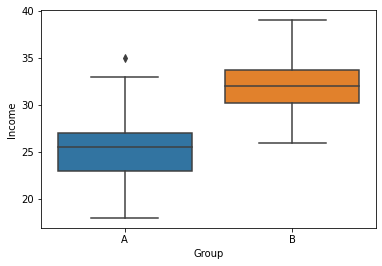

In [37]:
import seaborn as sns
sns.boxplot(x = "Group", y = "Income", data = AB);

**assumption check:**

+ normality

In [38]:
from scipy.stats import shapiro 

In [39]:
shapiro(A_B.A)

(0.9789242148399353, 0.7962799668312073)

&#9989; can't reject Ho; so distribution is normal; for A assumption is true

In [40]:
shapiro(A_B.B)

(0.9561261534690857, 0.2458445429801941)

&#9989; can't reject Ho; so distribution is normal; for B assumption is true

* variance homogenity - by levene test:

In [41]:
from scipy.stats import levene 

In [42]:
levene(A_B.A, A_B.B)

LeveneResult(statistic=1.1101802757158004, pvalue=0.2964124900636569)

&#9989; can't reject H0 (which says variances are homogen - no statistically significant difference between variance of distributions). so 2nd assumption is true.

+ test statistics:

In [44]:
stats.ttest_ind(A_B["A"], A_B["B"], equal_var = True)

Ttest_indResult(statistic=-7.028690967745927, pvalue=2.6233215605475075e-09)

**there is statistically significant difference between 2 groups -> H0 is rejected**

## Nonparametric unpaired two samples T test

+ if assumptions are not true -> use this one

In [45]:
stats.mannwhitneyu(A_B["A"], A_B["B"])

MannwhitneyuResult(statistic=89.5, pvalue=4.778975189306267e-08)

**reject H0, there is a statictically significant difference between groups**

# Paired Student T Test

## Hypothesis and test statistics

used to do comparison between 2 dependent groups

**Ex:** before-after applications or same application to the same group

hypothesis:

![](bagttest.jpg)


test statistics:

![](bagttest2.jpg)

D: difference


**assumptions:**

- normality
- variance homogenity 


**Problem:** a finance department is educated on a topic. Does education work? Any benefit?

H0: there is no statistically significant difference between before and after

In [46]:
before = pd.DataFrame([123,119,119,116,123,123,121,120,117,118,121,121,123,119,
            121,118,124,121,125,115,115,119,118,121,117,117,120,120,
            121,117,118,117,123,118,124,121,115,118,125,115])

after = pd.DataFrame([118,127,122,132,129,123,129,132,128,130,128,138,140,130,
             134,134,124,140,134,129,129,138,134,124,122,126,133,127,
             130,130,130,132,117,130,125,129,133,120,127,123])

In [47]:
#first data set:

together = pd.concat([before, after], axis = 1)
together.columns = ["before","after"]

print("'together' Data Set: \n\n ", together.head(), "\n\n")


#second data set:

group_before = np.arange(len(before))
group_before = pd.DataFrame(group_before)
group_before[:] = "before"
A = pd.concat([before, group_before], axis = 1)
group_after = np.arange(len(after))
group_after = pd.DataFrame(group_after)
group_after[:] = "after"
B = pd.concat([after, group_after], axis = 1)


#combining whole data

AB = pd.concat([A,B])
AB.columns = ["score","before_after"]
AB

'together' Data Set: 

     before  after
0     123    118
1     119    127
2     119    122
3     116    132
4     123    129 




,score,before_after
0,123,before
1,119,before
2,119,before
3,116,before
4,123,before
...,...,...
35,129,after
36,133,after
37,120,after
38,127,after


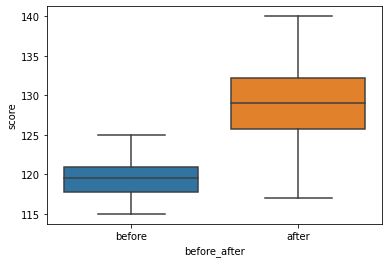

In [48]:
import seaborn as sns
sns.boxplot(x = "before_after", y = "score", data = AB);

**density graph:**

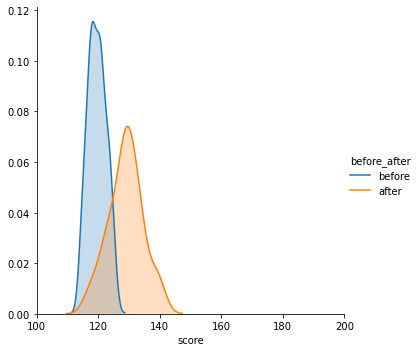

In [49]:
import seaborn as sns
(sns
  .FacetGrid(AB, 
             hue='before_after', 
             height=5, 
             xlim=(100, 200))
  .map(sns.kdeplot, 'score', shade=True)
 .add_legend()
);

&#9989; first group is more homogen. check assumptions.

**Assupmtions**

* normality:

In [50]:
from scipy.stats import shapiro

In [51]:
shapiro(together.before)

(0.9543654918670654, 0.10722342133522034)

+ we can't reject H0

In [52]:
shapiro(together.after)

(0.9780087471008301, 0.6159457564353943)

+ we cant't reject H0

* homogenity of variances

In [53]:
from scipy.stats import levene

In [54]:
levene(together.before,together.after)

LeveneResult(statistic=8.31303288672351, pvalue=0.0050844511807370246)

+ p<0.05 so reject H0. variance homogenity is not true

In [55]:
stats.ttest_rel(together.before, together.after)

Ttest_relResult(statistic=-9.281533480429937, pvalue=2.0235251764440722e-11)

**education worked!**

## Nonparametric dependent two samples test

In [56]:
stats.wilcoxon(together.before, together.after)

WilcoxonResult(statistic=15.0, pvalue=2.491492033374464e-07)

+ p<0.05; there is difference between means

# Two Samples Proportion Test 

## Hypothesis and test statistics

used to do comparison between 2 ratios


**hypothesis:**

![](tspro.jpg)


**test statistics:**

![](tsprotest.jpg)

Confidence interval: 

Sample statistics +- Table value * Standard deviation


**Assumptions:**

* n1 > 30

* n2 > 30


**Problem:** 

Green button or red button?

H0: P1 <= P2

H1: P1 > P2


Green button: 300 clicks, 1000 pageview

Red button: 250 clicks, 1100 pageview


Same population, alpha=0.05, Ztable=1.64

![](res1.jpg)

Zestimated=4.26 > Ztable=1.64

reject H0

In [57]:
from statsmodels.stats.proportion import proportions_ztest

In [58]:
success_count = np.array([300, 250])
obs_count = np.array([1000,1100])

In [59]:
proportions_ztest(success_count, obs_count)

(3.7857863233209255, 0.0001532232957772221)

assumption is true: n1>30, n2>30

H0 : no difference betw 2 ratios

p<0.05 so reject H0


In [60]:
300/1000

0.3

In [61]:
250/1100

0.22727272727272727

# Variance Analysis

used to learn if there is a statistically significant difference between means of 2 or more groups

Why don't you do t test for each 2 groups instead of variance analysis? Because for each test, there will be a probability for type 1 error; for 5 groups and alpha=0.05, total type 1 error will be 0.05*10=0.59. It means that for 59% of test, H0 will be rejected. So, if there are more than 2 groups, do variance analysis.


**Hypothesis:**

![](img21.jpg)


**Test statistics:**

![](img22.jpg)

avg error betw groups / avg error within group


**Assumptions:**

-  groups should be independent
- normal distribution
- variance homogenity


**Problem:**

You want to increase the time spent on your webpage. 3 strategies:

- write news simply
- write news with street language
- write news using sexist words

![](img23.jpg)


In [62]:
A = pd.DataFrame([28,33,30,29,28,29,27,31,30,32,28,33,25,29,27,31,31,30,31,34,30,32,31,34,28,32,31,28,33,29])

B = pd.DataFrame([31,32,30,30,33,32,34,27,36,30,31,30,38,29,30,34,34,31,35,35,33,30,28,29,26,37,31,28,34,33])

C = pd.DataFrame([40,33,38,41,42,43,38,35,39,39,36,34,35,40,38,36,39,36,33,35,38,35,40,40,39,38,38,43,40,42])

dfs = [A, B, C]

ABC = pd.concat(dfs, axis = 1)
ABC.columns = ["GROUP_A","GROUP_B","GROUP_C"]
ABC.describe().T


,count,mean,std,min,25%,50%,75%,max
GROUP_A,30.0,30.133333,2.224214,25.0,28.25,30.0,31.75,34.0
GROUP_B,30.0,31.700000,2.937862,26.0,30.00,31.0,34.00,38.0
GROUP_C,30.0,38.100000,2.808239,33.0,36.00,38.0,40.00,43.0


**assumptions:**

- dependency (determine in the beginning of study)
- normality (shapiro)
- variance homogenity (levene)

In [63]:
shapiro(ABC["GROUP_A"])
shapiro(ABC["GROUP_B"])
shapiro(ABC["GROUP_C"])

(0.9579201340675354, 0.273820161819458)

H0: no statistically significant difference between theoretical normal distribution and sample distribution.

p>0.05 for each group so H0 cannot be rejected. Normality assumption is true.

In [64]:
stats.levene(ABC["GROUP_A"], ABC["GROUP_B"],ABC["GROUP_C"])

LeveneResult(statistic=1.0267403645055275, pvalue=0.36247110117417064)

H0: variances of 3 groups are homogen.

p > 0.05 so H0 cannot be rejected.

variance homogenity assumption is true.

# **Oneway ANOVA:**

In [65]:
from scipy.stats import f_oneway
f_oneway(ABC["GROUP_A"], ABC["GROUP_B"],ABC["GROUP_C"])

F_onewayResult(statistic=74.69278140730431, pvalue=1.3079050746811477e-19)

+ p<0.05 so there is a statistically significant difference between groups

## Nonparametric variance analysis

+ if assumption is not true; do nonparametric variance analysis

In [66]:
from scipy.stats import kruskal
kruskal(ABC["GROUP_A"], ABC["GROUP_B"],ABC["GROUP_C"])

KruskalResult(statistic=54.19819735523783, pvalue=1.7022015426175926e-12)

+ there is difference between groups with 95% confidence interval

# Correlation Analysis

## Hypothesis and test statistics

a statistical method that provides information about relation, direction and quantity of the relation between variables

![](img24.jpg)


correlation ex: relation between product sale and product advertisement

correlation value is between -1 and +1

-1: excellent negative correlation

+1: excellent positive correlation

0: no correlation


**Hypothesis:**

Correlation significance test:

![](img25.jpg)


**Test statistics:**

relation between 2 variables:

![](img26.jpg)

pearson correlation coefficient is between 0 and 1

r (correlation coefficient): 
    - r>0 -> relation is positive
    - r<0 -> relation is negative
    - r=0 -> no relation


**Assumptions:**

- normality for 2 variables
- if assumption is true -> pearson correlation coefficient
- if assumption is not true -> spearman correlation coefficient



### **Problem:** is there any correlation between tip and bill?

In [67]:
import seaborn as sns
tips = sns.load_dataset('tips')
df = tips.copy()
df.head()

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4


* because total bill also contains tips, we will do subtraction:

In [68]:
df["total_bill"] = df["total_bill"] - df["tip"]

In [69]:
df.head()

,total_bill,tip,sex,smoker,day,time,size
0,15.98,1.01,Female,No,Sun,Dinner,2
1,8.68,1.66,Male,No,Sun,Dinner,3
2,17.51,3.50,Male,No,Sun,Dinner,3
3,20.37,3.31,Male,No,Sun,Dinner,2
4,20.98,3.61,Female,No,Sun,Dinner,4


### Visualization:

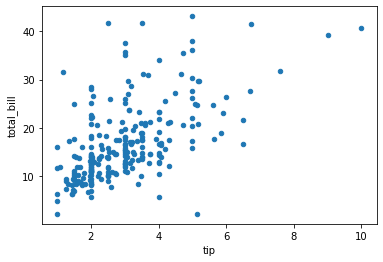

In [71]:
df.plot.scatter("tip","total_bill");

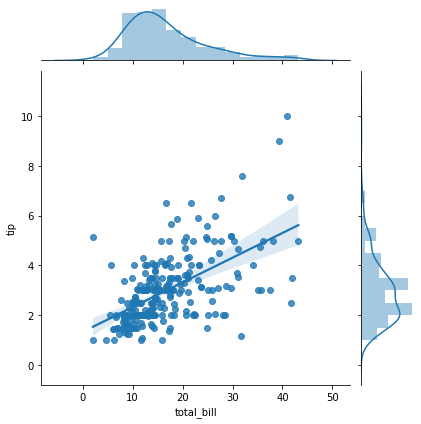

In [72]:
sns.jointplot(x = "total_bill",y = "tip", data = df, kind = "reg");

## check assumptions:

In [73]:
from scipy.stats import shapiro

In [74]:
shapiro(df["tip"])

(0.897811233997345, 8.20057563521992e-12)

+ p<0.05; normality assumption is not true! reject Ho which says distribution of sample and theory are same

In [75]:
import numpy as np

In [76]:
np.round(shapiro(df["total_bill"])[1], 5)

0.0

#### normality is not true for the second variable

In [77]:
df["tip"].corr(df["total_bill"])

0.5766634471096374

+ correlation value is 0.44 -> positive direction, middle correlation

In [78]:
df["tip"].corr(df["total_bill"], method = "spearman")

0.593691939408997

### Significance of correlation:

In [79]:
from scipy.stats.stats import pearsonr

In [80]:
pearsonr(df["total_bill"], df["tip"])

(0.5766634471096382, 5.018290084948277e-23)

In [81]:
np.round(pearsonr(df["total_bill"], df["tip"])[1], 5)

0.0

&#9989; reject H0 which says no correlation.

+ These is a significant correlation

## Nonparametric correlation test

In [82]:
import scipy.stats as st

In [83]:
st.spearmanr(df["total_bill"], df["tip"])

SpearmanrResult(correlation=0.593691939408997, pvalue=1.2452285137560276e-24)

In [84]:
st.kendalltau(df["total_bill"], df["tip"])

KendalltauResult(correlation=0.4400790074919885, pvalue=7.131027725873721e-24)